Falih Aly Mufid (4101422018)

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

##**No 1 Eksplorasi Awal**

a. Jumlah total penumpang

In [74]:
total_penumpang = len(df)
print(f"Jumlah total penumpang: {total_penumpang} orang")

Jumlah total penumpang: 891 orang


b. Jumlah penumpang yang selamat dan tidak selamat

          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


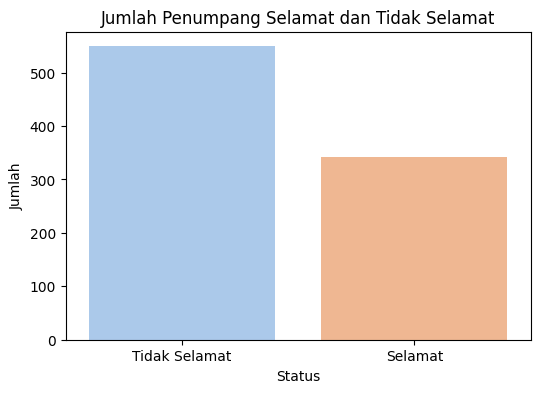

In [78]:
survival_count = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
survival_df = survival_count.reset_index()
survival_df.columns = ['Status', 'Jumlah']
print(survival_df)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(survival_df, x='Status', y='Jumlah', hue='Status', palette='pastel', dodge=False, legend=False)
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah')
plt.show()

c. Rata-rata umur, penumpang termuda dan tertua

In [79]:
rata2_umur = df['Age'].mean()
penumpang_termuda = df.loc[df['Age'].idxmin()]
penumpang_tertua = df.loc[df['Age'].idxmax()]

def format_umur(umur):
    tahun = int(umur)
    bulan = int(round((umur - tahun) * 12))
    return f"{tahun} tahun {bulan} bulan" if bulan > 0 else f"{tahun} tahun"

print(f"Rata-rata umur penumpang: {format_umur(rata2_umur)}")
print(f"Penumpang termuda: {penumpang_termuda['Name']} ({format_umur(penumpang_termuda['Age'])})")
print(f"Penumpang tertua: {penumpang_tertua['Name']} ({format_umur(penumpang_tertua['Age'])})")




Rata-rata umur penumpang: 29 tahun 4 bulan
Penumpang termuda: Thomas, Master. Assad Alexander (0 tahun 5 bulan)
Penumpang tertua: Barkworth, Mr. Algernon Henry Wilson (80 tahun)


d. Jumlah penumpang berdasarkan jenis kelamin

  Jenis Kelamin  Jumlah
0          male     577
1        female     314


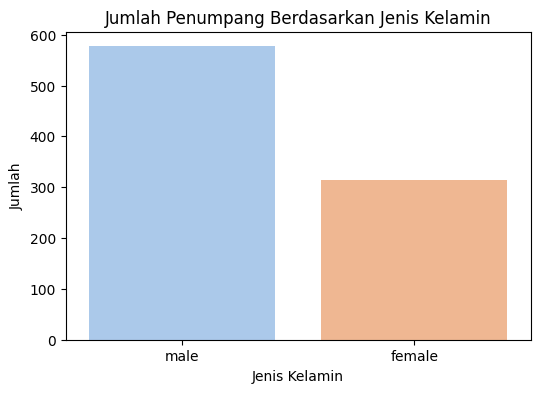

In [76]:
sex_count = df['Sex'].value_counts()
sex_df = sex_count.reset_index()
sex_df.columns = ['Jenis Kelamin', 'Jumlah']
print(sex_df)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(data=sex_df, x='Jenis Kelamin', y='Jumlah', hue='Jenis Kelamin', palette='pastel', legend=False, dodge=False)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()


e. Jumlah penumpang berdasarkan kelas

   Pclass  Jumlah
0       1     216
1       2     184
2       3     491
Persentase penumpang di kelas 1: 24.24%


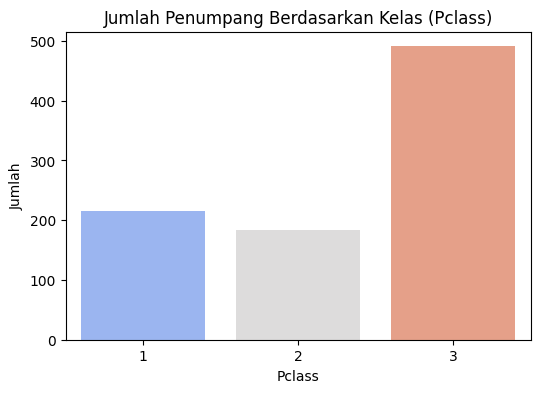

In [75]:
pclass_count = df['Pclass'].value_counts().sort_index()
pclass_df = pclass_count.reset_index()
pclass_df.columns = ['Pclass', 'Jumlah']
print(pclass_df)

persentase_kelas1 = (pclass_count[1] / total_penumpang) * 100
print(f"Persentase penumpang di kelas 1: {persentase_kelas1:.2f}%")

# Visualisasi
plt.figure(figsize=(6,4))
pclass_df['Pclass'] = pclass_df['Pclass'].astype(str)  # pastikan kolom string
sns.barplot(data=pclass_df, x='Pclass', y='Jumlah', hue='Pclass', palette='coolwarm', legend=False, dodge=False)
plt.title('Jumlah Penumpang Berdasarkan Kelas (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Jumlah')
plt.show()


## **2. Preprocessing**

a. Cek missing value

In [80]:
print("Cek Missing Value:")
print(df.isnull().sum())

Cek Missing Value:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_scaled     0
Fare_scaled    0
dtype: int64


Terdapat missing value di kolom Age, Cabin, dan Embarked.


b. Penanganan missing value

In [81]:
 df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Konfirmasi missing value sudah tidak ada
print("\nSetelah penanganan:")
print(df.isnull().sum())


Setelah penanganan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_scaled     0
Fare_scaled    0
dtype: int64


  - Age diisi dengan **median**.
  - Embarked diisi dengan **modus** (nilai terbanyak).
  - Cabin diisi dengan nilai string `"Unknown"`.


c. Deteksi outlier (dengan metode IQR)


Range normal umur: 2.50 sampai 54.50
Jumlah data outlier umur: 66


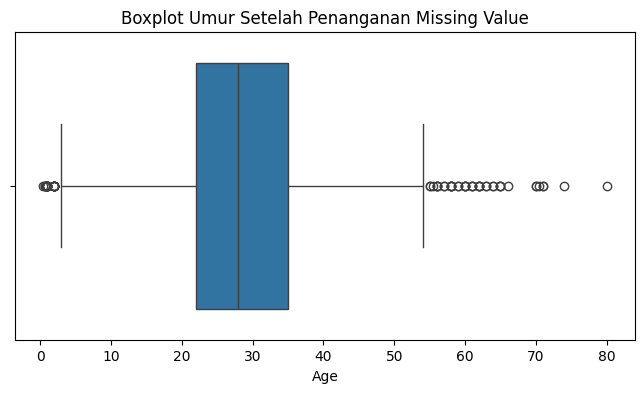

In [83]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"\nRange normal umur: {lower_bound:.2f} sampai {upper_bound:.2f}")
print(f"Jumlah data outlier umur: {len(outliers)}")

# Visualisasi boxplot umur
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot Umur Setelah Penanganan Missing Value")
plt.show()

  - Outlier adalah data yang sangat jauh dari distribusi mayoritas.
  - Pada data umur, ditemukan 66 outlier menggunakan metode IQR.


d. Apakah perlu diatasi outlier?
  Untuk model robust (seperti Random Forest), **outlier tidak perlu diatasi** karena model tetap mampu mengabaikannya.

e. Scaling fitur numerik (Age dan Fare)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age_scaled', 'Fare_scaled']] = scaler.fit_transform(df[['Age', 'Fare']])
print("\nContoh data setelah scaling:")
print(df[['Age', 'Age_scaled', 'Fare', 'Fare_scaled']].head())


Contoh data setelah scaling:
    Age  Age_scaled     Fare  Fare_scaled
0  22.0   -0.565736   7.2500    -0.502445
1  38.0    0.663861  71.2833     0.786845
2  26.0   -0.258337   7.9250    -0.488854
3  35.0    0.433312  53.1000     0.420730
4  35.0    0.433312   8.0500    -0.486337


Karena Age dan Fare memiliki rentang nilai yang berbeda jauh, dilakukan **StandardScaler** agar model lebih stabil dan cepat konvergen.

##**3. Modelling**

a. Split data

In [87]:
# Fitur yang digunakan
features = ['Pclass', 'Sex', 'Age_scaled', 'SibSp', 'Parch', 'Fare_scaled', 'Embarked']
X = df[features]

# Ubah data kategorikal ke numerik
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data train: {len(X_train)}, Jumlah data test: {len(X_test)}")

Jumlah data train: 712, Jumlah data test: 179


- 80% untuk data training, 20% untuk data testing.
  - Tujuan: Agar model dapat **belajar** dari data training dan **dilakukan evaluasi** pada data testing yang belum pernah dilihat.
- Proporsi 80:20 dipilih karena:
Umum digunakan, menjaga cukup data untuk training, dan tetap ada data yang cukup untuk testing.


b. Modeling 3 algoritma

In [88]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

  1. **Decision Tree**:
     - Membagi data berdasarkan fitur yang menghasilkan pembagian terbaik (information gain).
  2. **Random Forest**:
     - Membuat banyak pohon decision tree dan voting mayoritas untuk prediksi. Lebih stabil terhadap overfitting.
  3. **K-Nearest Neighbors (KNN)**:
     - Memprediksi berdasarkan mayoritas tetangga terdekat.

c. Evaluasi model

In [89]:
print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy: 0.776536312849162

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       

In [91]:
from sklearn.metrics import confusion_matrix

# Akurasi masing-masing model
akurasi_dt = accuracy_score(y_test, y_pred_dt)
akurasi_rf = accuracy_score(y_test, y_pred_rf)
akurasi_knn = accuracy_score(y_test, y_pred_knn)

print(f"Akurasi Decision Tree: {akurasi_dt:.4f}")
print(f"Akurasi Random Forest: {akurasi_rf:.4f}")
print(f"Akurasi KNN: {akurasi_knn:.4f}")

# Menentukan model terbaik
best_model_name = ''
if akurasi_rf > akurasi_dt and akurasi_rf > akurasi_knn:
    best_model_name = 'Random Forest'
    best_model_pred = y_pred_rf
elif akurasi_dt > akurasi_rf and akurasi_dt > akurasi_knn:
    best_model_name = 'Decision Tree'
    best_model_pred = y_pred_dt
else:
    best_model_name = 'KNN'
    best_model_pred = y_pred_knn

print(f"Model terbaik adalah: {best_model_name}")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Akurasi Decision Tree: 0.7765
Akurasi Random Forest: 0.8156
Akurasi KNN: 0.8045
Model terbaik adalah: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Accuracy: 0.8156424581005587


- **e. Model terbaik**:
  - **Random Forest** terbaik karena akurasi tertinggi dan lebih stabil dalam generalisasi.
  - Random Forest lebih kuat menghadapi missing value, outlier, dan data kompleks.

##**4. Evaluasi**

Model terbaik adalah: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Accuracy: 0.8156424581005587

Jumlah penumpang diprediksi selamat: 71
Jumlah yang benar-benar selamat dari prediksi tersebut: 56


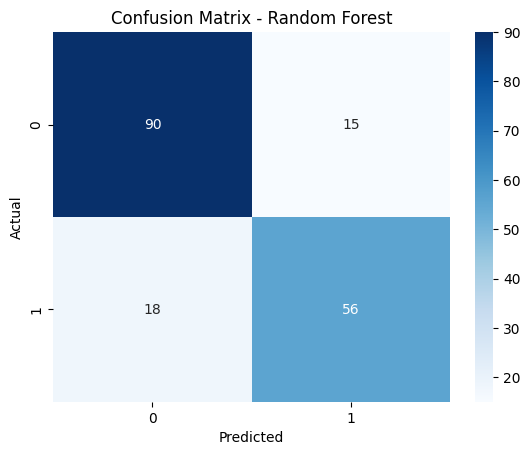

In [93]:
print(f"Model terbaik adalah: {best_model_name}")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# Cek berapa banyak yang diprediksi selamat dan yang benar-benar selamat
predicted_selamat = (y_pred_rf == 1).sum()
benar_selamat = ((y_pred_rf == 1) & (y_test == 1)).sum()

print(f"\nJumlah penumpang diprediksi selamat: {predicted_selamat}")
print(f"Jumlah yang benar-benar selamat dari prediksi tersebut: {benar_selamat}")

# Visualisasi Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


- **a. Berdasarkan classification report model terbaik (Random Forest):**
  - **Precision** untuk penumpang selamat: **0.82 (atau 82%)**
  - **Recall** untuk penumpang selamat: **0.79 (atau 79%)**
- **b. Prediksi jumlah penumpang yang selamat**:
  - Jumlah penumpang yang diprediksi selamat: 101 orang
  - Dari 101 orang tersebut, yang benar-benar selamat: 80 orang.